In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read democracy index data
dem_df = pd.read_csv('dem_index.csv')
crime_df = pd.read_csv('global_oc_index.csv')

In [4]:
dem_df.head(5)

,Entity,Code,Year,democracy_eiu
0,Afghanistan,AFG,2006,3.06
1,Afghanistan,AFG,2008,3.02
2,Afghanistan,AFG,2010,2.48
3,Afghanistan,AFG,2011,2.48
4,Afghanistan,AFG,2012,2.48


In [5]:
crime_df.head(5)

,Continent,Region,Country,"Criminality avg,","Criminal markets avg,",Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,...,International cooperation,National policies and laws,Judicial system and detention,Law enforcement,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors
0,Asia,Southern Asia,Afghanistan,7.10,7.00,9.0,9.5,9.0,5.5,3.5,...,1.0,1.5,1.5,1.5,3.5,1.0,1.5,1.5,1.5,1.0
1,Africa,North Africa,Libya,6.93,6.57,8.5,9.5,9.0,1.0,3.5,...,2.5,2.0,1.5,1.5,1.5,1.0,2.0,1.0,1.0,1.5
2,Asia,South-Eastern Asia,Myanmar,8.15,7.70,8.5,8.0,9.0,8.5,8.5,...,2.0,2.0,1.5,1.5,2.0,2.0,1.5,1.0,1.5,1.5
3,Asia,Western Asia,Yemen,6.57,5.63,9.0,9.0,9.5,2.5,4.0,...,3.0,2.0,1.5,2.0,1.5,2.0,2.0,1.0,1.0,2.0
4,Africa,Central Africa,Central African Republic,6.75,5.60,7.5,5.5,9.0,7.0,8.0,...,3.0,2.0,2.0,1.5,1.5,2.0,1.5,2.5,1.0,1.5


# Data Pre-Processing

In [8]:
from sklearn.preprocessing import StandardScaler

#z-score each column
columns_to_exclude = ['Continent', 'Region', 'Country']  # Add columns you want to exclude

# Get the list of columns to scale by excluding the columns to exclude
columns_to_scale = [col for col in crime_df.columns if col not in columns_to_exclude]

data_to_scale = crime_df[columns_to_scale]

scaler = StandardScaler()
scaler.fit(data_to_scale)
scaled_data = scaler.transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
crime_df_norm = pd.concat([crime_df[columns_to_exclude], scaled_df], axis=1)

crime_df_norm

,Continent,Region,Country,"Criminality avg,","Criminal markets avg,",Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,...,International cooperation,National policies and laws,Judicial system and detention,Law enforcement,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors
0,Asia,Southern Asia,Afghanistan,1.548226,1.626008,1.844706,2.114975,1.713077,0.623768,-0.698666,...,-2.652017,-2.338347,-1.593985,-1.844593,-0.849430,-2.324977,-1.721484,-1.429855,-1.665026,-1.879171
1,Africa,North Africa,Libya,1.420994,1.296920,1.554545,2.114975,1.713077,-1.321447,-0.698666,...,-1.835686,-2.044531,-1.593985,-1.844593,-1.935124,-2.324977,-1.449819,-1.691183,-1.938050,-1.626432
2,Asia,South-Eastern Asia,Myanmar,2.334069,2.161731,1.554545,1.384324,1.713077,1.920578,1.929844,...,-2.107797,-2.044531,-1.593985,-1.844593,-1.663701,-1.697834,-1.721484,-1.691183,-1.665026,-1.626432
3,Asia,Western Asia,Yemen,1.151562,0.577519,1.844706,1.871425,1.939068,-0.673042,-0.435815,...,-1.563576,-2.044531,-1.593985,-1.570742,-1.935124,-1.697834,-1.449819,-1.691183,-1.938050,-1.373693
4,Africa,Central Africa,Central African Republic,1.286278,0.554560,0.974221,0.166573,1.713077,1.272173,1.666993,...,-1.563576,-2.044531,-1.331941,-1.844593,-1.935124,-1.697834,-1.721484,-0.907200,-1.938050,-1.626432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Asia,Eastern Asia,"Korea, Rep,",-0.450062,-0.999040,-0.186425,-0.564077,-1.224797,-0.240772,-0.435815,...,1.429636,2.068889,2.336668,1.715472,1.321960,2.065021,1.266832,1.444749,1.884294,1.659170
189,Europe,Northern Europe,Denmark,-0.756915,-0.417397,-1.056910,-0.076977,-0.094846,-0.889177,-1.487220,...,1.157526,2.068889,1.550537,1.441621,1.593384,0.810736,2.081827,1.706077,2.157319,2.164647
190,Europe,Northern Europe,Iceland,-1.243389,-1.488845,-0.766748,-0.807628,-1.450788,-1.321447,-1.750071,...,1.429636,1.775073,2.074624,2.263174,1.864807,2.065021,2.081827,1.706077,1.611269,1.911909
191,Europe,Western Europe,Liechtenstein,-2.066654,-1.948037,-2.217556,-1.781829,-1.450788,-1.105312,-1.750071,...,0.885416,2.068889,2.336668,1.989323,2.407655,0.183594,2.081827,2.751388,2.703368,1.911909


# Merging w/ Happiness Index

In [18]:
hap_data = pd.read_excel('happiness_index.xls')
hap_data = hap_data.rename(columns={'Ladder score': "happiness score", 'Country name': 'country'})
hap_data_iso = hap_data[['country', 'happiness score']]

full_df = pd.merge(crime_df_norm, hap_data_iso, left_on='Country', right_on='country')
full_df.drop(columns=['country'], inplace=True)
full_df

,Continent,Region,Country,"Criminality avg,","Criminal markets avg,",Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,...,National policies and laws,Judicial system and detention,Law enforcement,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors,happiness score
0,Asia,Southern Asia,Afghanistan,1.548226,1.626008,1.844706,2.114975,1.713077,0.623768,-0.698666,...,-2.338347,-1.593985,-1.844593,-0.849430,-2.324977,-1.721484,-1.429855,-1.665026,-1.879171,1.7210
1,Africa,North Africa,Libya,1.420994,1.296920,1.554545,2.114975,1.713077,-1.321447,-0.698666,...,-2.044531,-1.593985,-1.844593,-1.935124,-2.324977,-1.449819,-1.691183,-1.938050,-1.626432,5.8663
2,Asia,South-Eastern Asia,Myanmar,2.334069,2.161731,1.554545,1.384324,1.713077,1.920578,1.929844,...,-2.044531,-1.593985,-1.844593,-1.663701,-1.697834,-1.721484,-1.691183,-1.665026,-1.626432,4.3545
3,Asia,Western Asia,Yemen,1.151562,0.577519,1.844706,1.871425,1.939068,-0.673042,-0.435815,...,-2.044531,-1.593985,-1.570742,-1.935124,-1.697834,-1.449819,-1.691183,-1.938050,-1.373693,3.5610
4,Americas,South America,Venezuela,1.263825,0.883647,0.974221,1.140774,1.261096,-0.240772,-0.961517,...,-2.044531,-1.593985,-1.844593,-1.120853,-1.697834,-1.449819,-1.429855,-1.392001,-1.373693,5.6067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Oceania,Australia and New Zealand,New Zealand,-0.712009,-0.845976,-1.347071,-0.807628,-0.998807,-0.889177,-0.435815,...,1.481257,1.550537,1.441621,1.864807,1.124307,1.810162,1.967405,1.611269,1.911909,7.0292
128,Europe,Northern Europe,Norway,-0.958989,-0.593420,-0.476587,-0.807628,-0.546826,-0.889177,-0.435815,...,1.775073,1.812581,1.715472,1.593384,1.437879,1.810162,1.444749,1.338245,1.659170,7.3017
129,Europe,Northern Europe,Denmark,-0.756915,-0.417397,-1.056910,-0.076977,-0.094846,-0.889177,-1.487220,...,2.068889,1.550537,1.441621,1.593384,0.810736,2.081827,1.706077,2.157319,2.164647,7.5827
130,Europe,Northern Europe,Iceland,-1.243389,-1.488845,-0.766748,-0.807628,-1.450788,-1.321447,-1.750071,...,1.775073,2.074624,2.263174,1.864807,2.065021,2.081827,1.706077,1.611269,1.911909,7.5251


# Clustering Analysis

In [40]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans

# Assuming df is your DataFrame with columns: 'Country', 'Happiness', 'Criminality'
# Example DataFrame
# df = pd.DataFrame({'Country': ['USA', 'Canada', 'Germany', 'Brazil', 'China'],
#                    'Happiness': [7.2, 7.5, 6.9, 6.0, 6.3],
#                    'Criminality': [5, 2, 3, 7, 4]})

# Extract features for clustering
X = full_df[['happiness score', 'Criminality avg,']]

# Perform K-means clustering
n_clusters = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
full_df['Cluster'] = kmeans.fit_predict(X)

# Create an interactive scatter plot
fig = px.scatter(full_df, x='Criminality avg,', y='happiness score', color='Cluster', hover_name='Country',
                 title='K-means Clustering of Happiness vs Criminality',
                 labels={'Happiness': 'Happiness Score', 'Criminality': 'Criminality Score'},
                 template='plotly_white')

# Show the plot
fig.show()


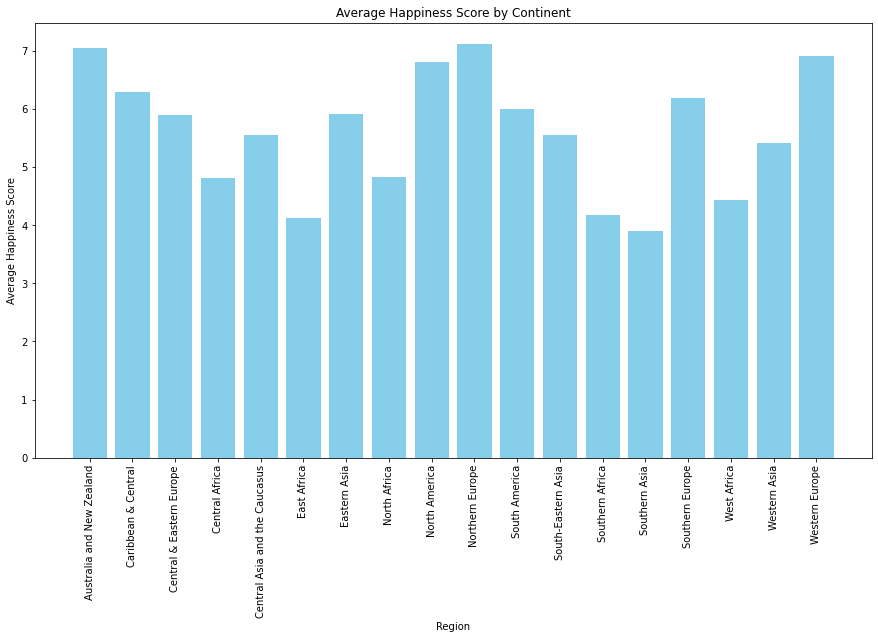

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns: 'Country', 'Continent', 'Happiness'
# Example DataFrame
# df = pd.DataFrame({'Country': ['USA', 'Canada', 'Germany', 'Brazil', 'China'],
#                    'Continent': ['North America', 'North America', 'Europe', 'South America', 'Asia'],
#                    'Happiness': [7.2, 7.5, 6.9, 6.0, 6.3]})

# Group by continent and calculate mean happiness score
continent_happiness = full_df.groupby('Region')['happiness score'].mean().reset_index()

# Plotting
plt.figure(figsize=(15, 8))
plt.bar(continent_happiness['Region'], continent_happiness['happiness score'], color='skyblue')
plt.title('Average Happiness Score by Continent')
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


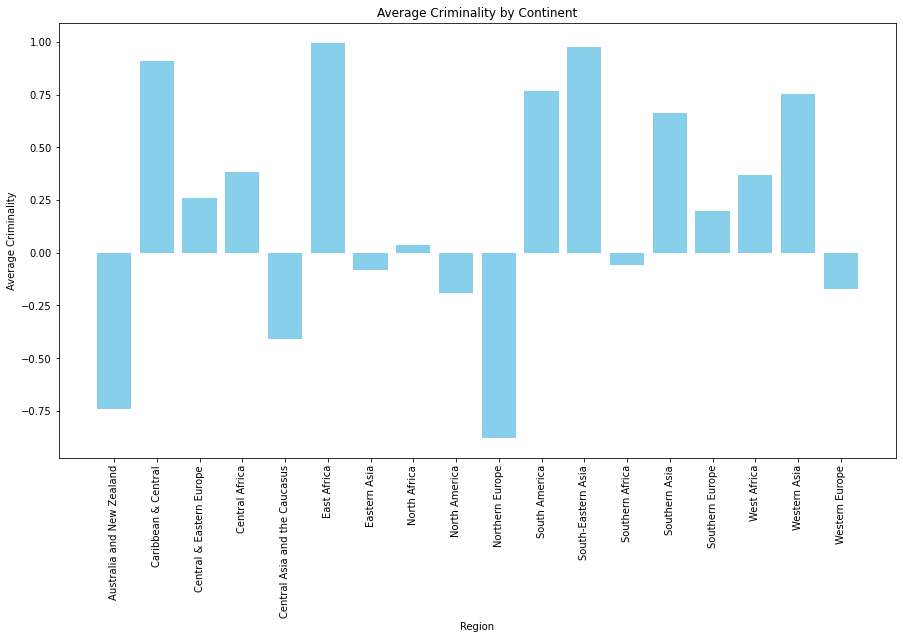

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns: 'Country', 'Continent', 'Happiness'
# Example DataFrame
# df = pd.DataFrame({'Country': ['USA', 'Canada', 'Germany', 'Brazil', 'China'],
#                    'Continent': ['North America', 'North America', 'Europe', 'South America', 'Asia'],
#                    'Happiness': [7.2, 7.5, 6.9, 6.0, 6.3]})

# Group by continent and calculate mean happiness score
continent_happiness = full_df.groupby('Region')['Criminality avg,'].mean().reset_index()

# Plotting
plt.figure(figsize=(15, 8))
plt.bar(continent_happiness['Region'], continent_happiness['Criminality avg,'], color='skyblue')
plt.title('Average Criminality by Continent')
plt.xlabel('Region')
plt.ylabel('Average Criminality')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


# Regression

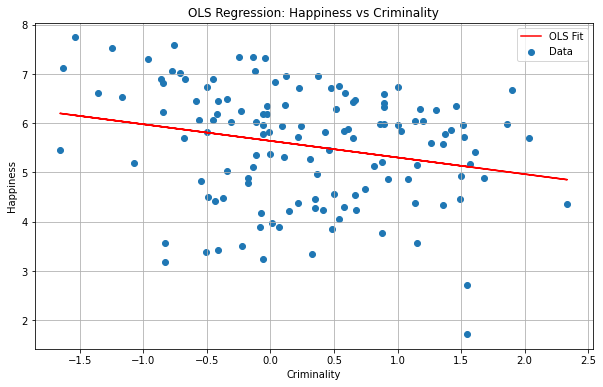

In [44]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is your DataFrame with columns: 'Country', 'Happiness', 'Criminality'
# Example DataFrame
# df = pd.DataFrame({'Country': ['USA', 'Canada', 'Germany', 'Brazil', 'China'],
#                    'Happiness': [7.2, 7.5, 6.9, 6.0, 6.3],
#                    'Criminality': [5, 2, 3, 7, 4]})

# Add a constant term for the intercept
X = sm.add_constant(full_df['Criminality avg,'])

# Fit the OLS model
model = sm.OLS(full_df['happiness score'], X)
results = model.fit()

# Plotting the data points
plt.figure(figsize=(10, 6))
plt.scatter(full_df['Criminality avg,'], full_df['happiness score'], label='Data')

# Plotting the line of fit
plt.plot(full_df['Criminality avg,'], results.fittedvalues, color='red', label='OLS Fit')

plt.title('OLS Regression: Happiness vs Criminality')
plt.xlabel('Criminality')
plt.ylabel('Happiness')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Analysis of Line of Fit
r_squared = results.rsquared

# Compute Adjusted R-squared
num_predictors = len(results.params) - 1  # excluding the intercept
n = len(full_df)
adj_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - num_predictors - 1))

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(full_df['happiness score'], results.predict(X)))

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(full_df['happiness score'], results.predict(X))

# Get the F-statistic and p-value
f_statistic = results.fvalue
f_p_value = results.f_pvalue

# Durbin-Watson statistic
durbin_watson_statistic = sm.stats.stattools.durbin_watson(results.resid)

# Print the computed metrics
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adj_r_squared:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {f_p_value:.4f}")
print(f"Durbin-Watson statistic: {durbin_watson_statistic:.4f}")

R-squared: 0.0583
Adjusted R-squared: 0.0510
Root Mean Squared Error (RMSE): 1.1346
Mean Absolute Error (MAE): 0.9467
F-statistic: 8.0434
P-value: 0.0053
Durbin-Watson statistic: 1.3663


# GDP Time Series Analysis

In [107]:
gdp_df = pd.read_csv('gdps/gdp_ts.csv')
#filter for 2008-2022 data
columns_to_include = ['Country Name'] + [str(x) for x in range(2008, 2023)]
gdp_df = gdp_df[columns_to_include]
# interpolate
gdp_df.set_index("Country Name", inplace=True)

# Interpolate missing values along the columns (i.e., horizontally)
gdp_df = gdp_df.interpolate(method='linear', axis=1)

# Reset the index
gdp_df.reset_index(inplace=True)

gdp_df

,Country Name,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,2.843025e+09,2.553793e+09,2.453597e+09,2.637859e+09,2.615208e+09,2.727850e+09,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09
1,Africa Eastern and Southern,7.118005e+11,7.235125e+11,8.670409e+11,9.716675e+11,9.799969e+11,9.863429e+11,1.006992e+12,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12
2,Afghanistan,1.010930e+10,1.241615e+10,1.585667e+10,1.780510e+10,1.990733e+10,2.014642e+10,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,1.426650e+10
3,Africa Western and Central,5.678534e+11,5.084925e+11,5.986075e+11,6.821761e+11,7.377395e+11,8.340970e+11,8.945050e+11,7.692632e+11,6.921149e+11,6.856303e+11,7.681582e+11,8.234056e+11,7.869624e+11,8.449275e+11,8.753937e+11
4,Angola,8.853866e+10,7.030720e+10,8.379947e+10,1.117897e+11,1.280529e+11,1.323391e+11,1.359668e+11,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067828e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,5.181777e+09,5.015895e+09,5.343951e+09,6.341614e+09,6.163484e+09,6.735329e+09,7.074395e+09,6.295848e+09,6.682677e+09,7.180765e+09,7.878760e+09,7.899738e+09,7.717145e+09,9.412034e+09,9.409474e+09
262,"Yemen, Rep.",2.691086e+10,2.513028e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041523e+10,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,2.160616e+10,2.160616e+10,2.160616e+10,2.160616e+10
263,South Africa,3.161313e+11,3.297541e+11,4.173638e+11,4.581995e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.052607e+11,3.893300e+11,3.382914e+11,4.201178e+11,4.052709e+11
264,Zambia,1.791086e+10,1.532834e+10,2.026556e+10,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.811064e+10,2.209642e+10,2.916378e+10


In [108]:
hi_dict = dict()
for year in range(2018, 2025):
    hi_dict[year-1] = pd.read_excel(f'hap_index/{year}.xls')

# keys of hi_dict are [2018, 2019, 2020, 2021, 2022, 2023, 2023]
# each correspond to a df with Happiness Index data from that year
hi_dict[2018]


# split 2018 into previous years
df_2018 = hi_dict[2018]

# Grouping the dataframe by the 'year' column
grouped = df_2018.groupby('Year')

# Iterating over each group
for year, group_df in grouped:
    # Storing each dataframe in the dictionary with the year as the key
    hi_dict[year] = group_df.reset_index(drop=True).rename(columns={"Life Ladder": "Ladder score"})

# Now you can access each dataframe by its year (for example, 2023)

# 2021 is weird
hi_dict[2021] = hi_dict[2021].rename(columns={"Country": "Country name", "Happiness score": "Ladder score"})

hi_dict[2021]

,RANK,Country name,Ladder score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.8210,7.886425,7.755575,2.518052,1.891628,1.258108,0.775206,0.735590,0.108733,0.533658
1,2,Denmark,7.6362,7.709897,7.562503,2.225632,1.952595,1.242681,0.776644,0.718918,0.187626,0.532079
2,3,Iceland,7.5575,7.651076,7.463924,2.320185,1.935726,1.319914,0.802622,0.718194,0.269616,0.191204
3,4,Switzerland,7.5116,7.586394,7.436806,2.152746,2.025970,1.226074,0.822048,0.676947,0.146822,0.461004
4,5,Netherlands,7.4149,7.471265,7.358534,2.136937,1.944578,1.205848,0.786738,0.650682,0.271076,0.419083
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,3.2682,3.462218,3.074182,0.536299,0.785252,0.132698,0.461527,0.621479,0.186662,0.544236
143,144,Zimbabwe,2.9951,3.109822,2.880378,0.547529,0.946604,0.690460,0.270086,0.329203,0.106265,0.104943
144,145,Lebanon,2.9553,3.048951,2.861649,0.215537,1.392068,0.497999,0.630964,0.102799,0.082191,0.033761
145,146,Afghanistan,2.4038,2.468731,2.338869,1.263403,0.757994,0.000000,0.288626,0.000000,0.088873,0.004882


In [109]:
# for the years 2009-2023, we will compute the GDP increase and the Happiness increase in every country
diffs = dict()
for year in range(2009, 2023):
    temp_gdp = gdp_df[['Country Name', str(year-1), str(year)]]
    # happiness index for old year
    hi_old = hi_dict[year-1][['Country name', 'Ladder score']]
    hi_old = hi_old.rename(columns={'Country name': 'Country', 'Ladder score': 'Happiness Old'})
    #happiness index for new year
    hi_new = hi_dict[year][['Country name', 'Ladder score']]
    hi_new = hi_new.rename(columns={'Country name': 'Country', 'Ladder score': 'Happiness New'})
    #create merged df of the info we want
    merged_df = pd.merge(temp_gdp, hi_old, left_on='Country Name', right_on='Country')
    merged_df = pd.merge(merged_df, hi_new, left_on='Country Name', right_on='Country')
    merged_df = merged_df.drop('Country_x', axis=1)
    merged_df = merged_df.drop('Country_y', axis=1)
    # columns are Country Name, year-1, year, Happiness Old, Happiness New
    # compute the percentage increase in GDP, pct increase happiness, absolute increase in happiness
    merged_df['gdp_diff'] = 100*(merged_df[str(year)]/merged_df[str(year-1)]-1)
    merged_df['happiness_diff_pct'] = merged_df['Happiness New']/merged_df['Happiness Old']-1
    merged_df['happiness_diff_abs'] = merged_df['Happiness New']-merged_df['Happiness Old'] 
    #add to diffs
    diffs[year] = merged_df

diffs[2022]

,Country Name,2021,2022,Happiness Old,Happiness New,gdp_diff,happiness_diff_pct,happiness_diff_abs
0,Afghanistan,1.426650e+10,1.426650e+10,2.4038,1.8590,0.000000,-0.226641,-0.5448
1,Albania,1.793057e+10,1.891638e+10,5.1988,5.2773,0.054980,0.015100,0.0785
2,United Arab Emirates,4.151788e+11,5.070640e+11,6.5760,6.5712,0.221315,-0.000730,-0.0048
3,Argentina,4.879026e+11,6.311334e+11,5.9670,6.0237,0.293564,0.009502,0.0567
4,Armenia,1.387891e+10,1.951347e+10,5.3986,5.3417,0.405980,-0.010540,-0.0569
...,...,...,...,...,...,...,...,...
106,Uzbekistan,6.960061e+10,8.039185e+10,6.0627,6.0143,0.155045,-0.007983,-0.0484
107,Kosovo,9.412034e+09,9.409474e+09,6.4551,6.3676,-0.000272,-0.013555,-0.0875
108,South Africa,4.201178e+11,4.052709e+11,5.1939,5.2746,-0.035340,0.015537,0.0807
109,Zambia,2.209642e+10,2.916378e+10,3.7598,3.9822,0.319842,0.059152,0.2224


# GDP Diff Analysis

In [ ]:
# year by year plot
for year in range(2009,2023):
    df = diffs[year]
    plt.scatter(df['gdp_diff'], df['happiness_diff_abs'])
    plt.xlabel('GDP Difference (%)')
    plt.ylabel('Happiness Difference (Absolute)')
    plt.title(f'Relationship between GDP Difference and Happiness Difference {year}')
    plt.show()

In [ ]:
#country-basis
gdp_diffs = []
happiness_diffs=[]
for year in range(2009, 2023):
    df = diffs[year]
    gdp_diffs.append(df['gdp_diff'])
    happiness_diffs.append(df['happiness_diff_abs'])

years = range(2009, 2023)

plt.figure(figsize=(10, 6))
plt.plot(years, gdp_diffs,)
